In [ ]:
import sys
print(sys.version)


3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import datetime




In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

In [ ]:
train_transform = transforms.Compose([
                                      transforms.ToTensor()
])
valid_transform = train_transform

In [ ]:
train_set = MNIST('./data/mnist', train=True, download=True, transform=train_transform)
valid_set = MNIST('./data/mnist', train=False, download=True, transform=valid_transform)




Extracting ./data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw


Extracting ./data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw


Extracting ./data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw


Extracting ./data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print('train set data shape: ', train_set.data.shape)
print('train set labels shape: ', train_set.targets.shape)
print('valid set data shape: ', valid_set.data.shape)
print('valid set labels shape: ', valid_set.targets.shape)


train set data shape:  torch.Size([60000, 28, 28])
train set labels shape:  torch.Size([60000])
valid set data shape:  torch.Size([10000, 28, 28])
valid set labels shape:  torch.Size([10000])


In [ ]:

mean = torch.mean(train_set.data[:].float())
print('mean = ', mean)
stdev = torch.std(train_set.data[:].float())
print('stdev = ', stdev)

mean =  tensor(33.3184)
stdev =  tensor(78.5675)


label =  tensor(1)


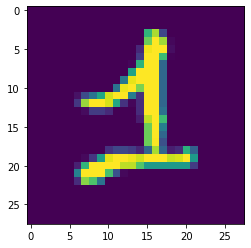

In [ ]:
idx = 24

img = train_set.data[idx]
img.shape
plt.imshow(img)
label = train_set.targets[idx].numpy()
# label = train_set.targets[idx]
print('label = ', label)




In [ ]:
print(img.data)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 166, 222,  55,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 197, 254, 218,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          29, 249, 254, 254,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

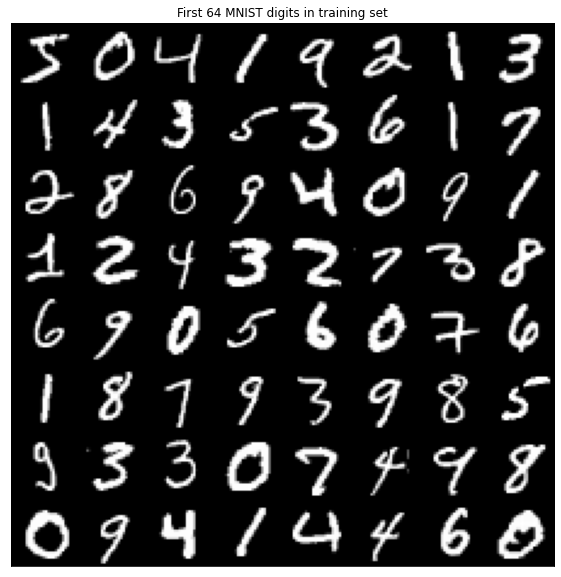

Labels: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0]


In [ ]:
plt.figure(figsize=(10,10))

sample = train_set.data[:64]
# shape (64, 28, 28)
sample = sample.reshape(8,8,28,28)
# shape (8, 8, 28, 28)
sample = sample.permute(0,2,1,3)
# shape (8, 28, 8, 28)
sample = sample.reshape(8*28,8*28)
# shape (8*28, 8*28)
plt.imshow(sample)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('First 64 MNIST digits in training set')
plt.gray()
plt.show()

print('Labels:', train_set.targets[:64].numpy())